In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as mpt

**Distribution of work accidents among departments**

In [ ]:
data_path = "/content/HR_comma_sep.csv"
df_hr = pd.read_csv(data_path)
df_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
accident_cnt = df_hr.groupby('Department').agg({'Work_accident': "sum"})
accident_cnt

,Work_accident
Department,
IT,164
RandD,134
accounting,96
hr,89
management,103
marketing,138
product_mng,132
sales,587
support,345


In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
plt.figure(figsize=(8, 6))

pie_labels = accident_cnt.index
pie_data = accident_cnt['Work_accident']

explode = [0, 0, 0, 0, 0, 0, 0, 0.09, 0, 0]

plt.pie(
    pie_data,
    labels= pie_labels,
    autopct= '%1.1f%%',
    startangle = 140,
    shadow = True,
    explode = explode
)
plt.title('Work accident Distribution by Department')
plt.show()

NameError: name 'accident_cnt' is not defined

<Figure size 800x600 with 0 Axes>

**What is the distribution of Promotions based on Departments?**

In [ ]:
df_hr.groupby(['Department', 'promotion_last_5years'])['promotion_last_5years'].count()

Department   promotion_last_5years
IT           0                        1224
             1                           3
RandD        0                         760
             1                          27
accounting   0                         753
             1                          14
hr           0                         724
             1                          15
management   0                         561
             1                          69
marketing    0                         815
             1                          43
product_mng  0                         902
sales        0                        4040
             1                         100
support      0                        2209
             1                          20
technical    0                        2692
             1                          28
Name: promotion_last_5years, dtype: int64

In [ ]:
promotion_dist = df_hr.groupby(['Department', 'promotion_last_5years'])['promotion_last_5years'].count().unstack()
promotion_dist

promotion_last_5years,0,1
Department,,
IT,1224.0,3.0
RandD,760.0,27.0
accounting,753.0,14.0
hr,724.0,15.0
management,561.0,69.0
marketing,815.0,43.0
product_mng,902.0,NaN
sales,4040.0,100.0
support,2209.0,20.0


<Axes: xlabel='Department'>

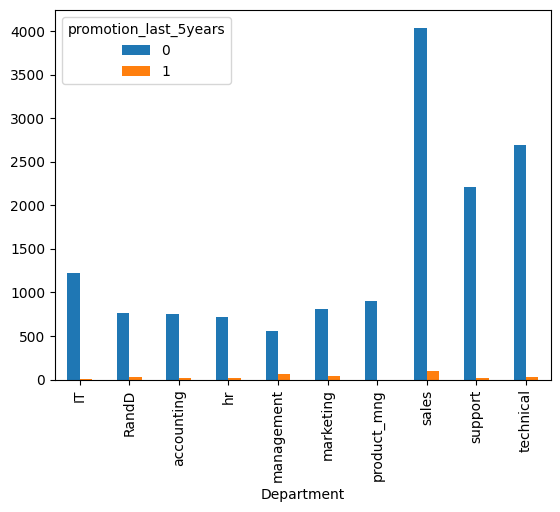

In [ ]:
promotion_dist.plot(kind='bar')

<Axes: xlabel='Department'>

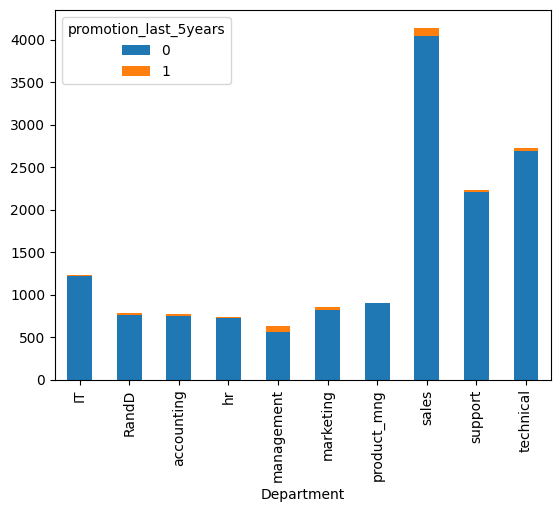

In [ ]:
promotion_dist.plot(kind='bar', stacked = True)

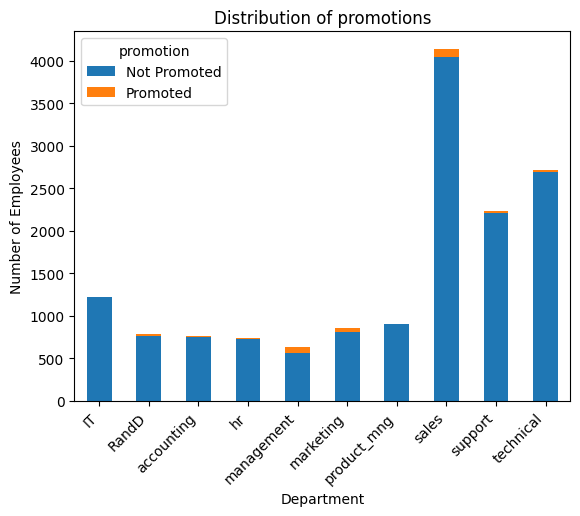

In [ ]:
ax = promotion_dist.plot(kind='bar', stacked = True)

ax.set_xlabel('Department')
ax.set_ylabel('Number of Employees')
ax.set_title('Distribution of promotions')

plt.xticks(rotation=45, ha='right')
plt.legend(title='promotion', labels= ['Not Promoted', 'Promoted'])
plt.show()

**How does employee satisfaction vary across department?**

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

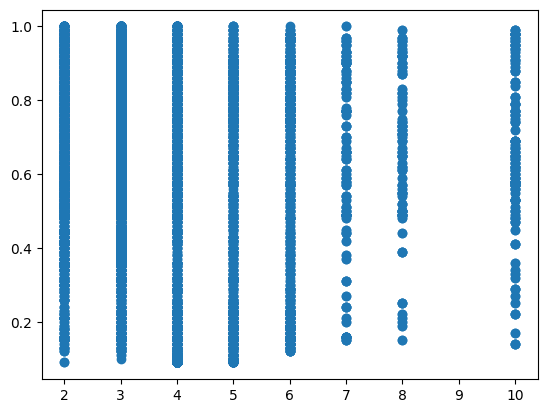

In [ ]:
plt.scatter(df_hr['time_spend_company'], df_hr['satisfaction_level'])

In [ ]:
sat_by_time_spend = df_hr.groupby('time_spend_company').agg({'satisfaction_level': 'mean', 'left': 'sum'}).reset_index()

x_data = sat_by_time_spend['time_spend_company']
y_data = sat_by_time_spend['satisfaction_level']
z_data = sat_by_time_spend['left']

z_weights = (z_data - z_data.min()) / (z_data.max() - z_data.min())

sat_by_time_spend

#z_weights


,time_spend_company,satisfaction_level,left
0,2,0.697078,53
1,3,0.626314,1586
2,4,0.467517,890
3,5,0.610305,833
4,6,0.603440,209
5,7,0.635957,0
6,8,0.665062,0
7,10,0.655327,0


In [ ]:
z_weights

0    0.033417
1    1.000000
2    0.561160
3    0.525221
4    0.131778
5    0.000000
6    0.000000
7    0.000000
Name: left, dtype: float64

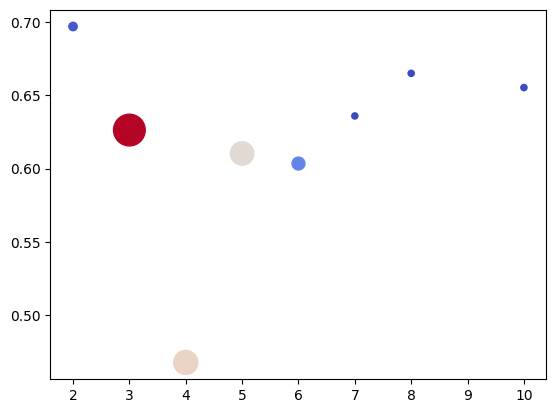

In [ ]:
ax= plt.scatter(sat_by_time_spend['time_spend_company'], sat_by_time_spend['satisfaction_level'], c=z_weights, cmap= 'coolwarm', s=z_weights*500+20)

In [1]:
#set title, xlabel, ylabel

ax= plt.scatter(sat_by_time_spend['time_spend_company'], sat_by_time_spend['satisfaction_level'], c=z_weights, cmap= 'coolwarm', s=z_weights*500+20)

plt.xlabel('Time Spend (Years)', fontweight= 'bold')
plt.ylabel('Satisfaction Scores', fontweight= 'bold')
plt.title('Employee Leaving Status', fontsize=16, fontweight='bold')

plt.colorbar(ax)

plt.grid(linestyle= '--')

NameError: name 'plt' is not defined